## Summary results

In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def get_dataframe(target, target_folder, features, epsilon):
    # 1. Get subidrectories
    subdirs = [os.path.join('.', folder, target) for folder in target_folder]
    # 2. Load dataframes
    dataframes = [pd.read_csv(path, index_col=[0]) for path in subdirs]
    # 3. Slice them
    dataframes = [df.loc[df.Epsilon == epsilon, features] for df in dataframes]
    # 4. Retunr concat
    return pd.concat(dataframes)

def create_table(df):
    best_result = []
    for optim in df.Optim.unique():
        crnt_df = df[(df.Optim == optim)]
        best = crnt_df[crnt_df.SuccesRate == crnt_df.SuccesRate.max()].iloc[0, :]
        best_result.append(best)
    return pd.DataFrame(best_result, columns = df.columns)

def plot_by_gradient(df, ax, title = 0):
    
    max_gradient = df.NGradient.max()
    for optim in df.Optim.unique():
        X = df.loc[df.Optim == optim, 'NGradient'].tolist() + [max_gradient]
        Y = df.loc[df.Optim == optim, 'SuccesRate'].tolist() + [df.loc[df.Optim == optim, 'SuccesRate'].tolist()[-1]]
        ax.plot(X, Y, label = optim.capitalize())
    
    if title == 0:
        attack_type = ' untarget ' if df.loc[0, 'Target'] == 0 else ' target '
        data = str(df.Data[0]).upper()
        ax.set_title(data + attack_type + 'attack with $L_{\infty} < $'+str(epsilon))
    else:
        ax.set_title(title)
    ax.set_xlabel('Function evaluation per step')
    ax.set_ylabel('Succes rate')
    ax.legend()
    ax.grid()    
    return ax

def plot_by_time(df, ax, title = 0):
    max_time = df['MeanTime'].max()
    for optim in df.Optim.unique():
        X = sorted(df.loc[df.Optim == optim, 'MeanTime'].tolist() + [max_time])
        Y = df.loc[df.Optim == optim, 'SuccesRate'].tolist() + [df.loc[df.Optim == optim, 'SuccesRate'].tolist()[-1]]
        ax.plot(X, Y, label = optim.capitalize())
    
    if title == 0:
        attack_type = ' untarget ' if df.loc[0, 'Target'] == 0 else ' target '
        data = str(df.Data[0]).upper()
        ax.set_title(data + attack_type + 'attack with $L_{\infty} < $'+str(epsilon))
    else:
        ax.set_title(title)
    
    ax.set_xlabel('Mean time per attack (s)')
    ax.set_ylabel('Succes rate')
    ax.legend()
    ax.grid()    
    return ax


def scatter_by_time(df, ax):
    for n, values in df.iterrows():
        l = '{}.{}'.format(values[0], values[-1]) if type(values[-1]) == str else values[0]
        ax.scatter(values[-3], values[3], label = l)

    ax.set_title('Succes Rate by time')
    ax.set_xlabel('Time per attack')
    ax.set_ylabel('Succes Rate')
    ax.set_ylim([0.75, 1])
    ax.legend(loc='lower right')
    ax.grid()
    
    
def scatter_by_epsilon(df, ax):
    for n, values in df.iterrows():
        l = '{}.{}'.format(values[0], values[-1]) if type(values[-1]) == str else values[0]
        ax.scatter(values[-2], values[3], label = l)

    ax.set_title('Succes Rate and mean epsilon')
    ax.set_xlabel('Mean Epsilon')
    ax.set_ylabel('Succes Rate')
    ax.set_ylim([0.75, 1])
    ax.legend(loc='lower right')
    ax.grid()

### 1. MNIST

**1.a Infinity norm**

In [68]:
### UNTARGET
target = 'MUI.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG', 'FrankWolfe']
features = ['Optim', 'Target', 'Data', 'Epsilon', 'SuccesRate', 'NGradient', 'MeanTime']
epsilon = 0.2

df = get_dataframe(target, target_folder, features, epsilon)
latex_table = create_table(df)
latex_table

,Optim,Target,Data,Epsilon,SuccesRate,NGradient,MeanTime
1,inexact,0,mnist,0.2,0.97,1000,0.153588
21,classic,0,mnist,0.2,0.97,4000,0.860286
1,fw,0,mnist,0.2,0.98,1000,0.957440


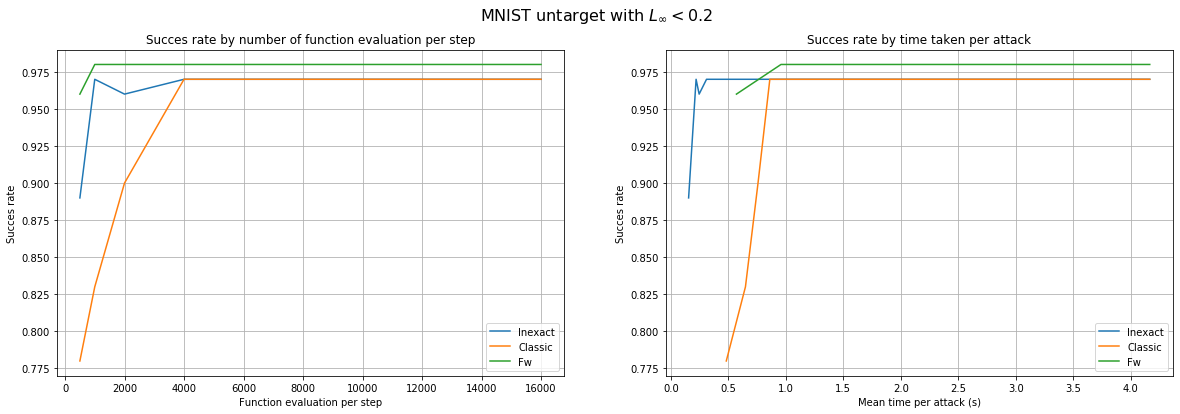

In [69]:
fig = plt.figure(figsize = (20, 6))
fig.suptitle('MNIST untarget with $L_{\infty} < 0.2$', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
plot_by_gradient(df, ax, title='Succes rate by number of function evaluation per step')
ax = fig.add_subplot(1, 2, 2)
plot_by_time(df, ax, title='Succes rate by time taken per attack')
plt.show()

In [70]:
### TARGET
target = 'MTI.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG', 'FrankWolfe']
features = ['Optim', 'Target', 'Data', 'Epsilon', 'SuccesRate', 'NGradient', 'MeanTime']
epsilon = 0.2

df = get_dataframe(target, target_folder, features, epsilon)
latex_table = create_table(df)
latex_table

,Optim,Target,Data,Epsilon,SuccesRate,NGradient,MeanTime
5,inexact,1,mnist,0.2,0.700000,16000,5.069098
9,classic,0,mnist,0.2,0.555556,8000,6.632288
6,fw,1,mnist,0.2,0.711111,4000,16.605202


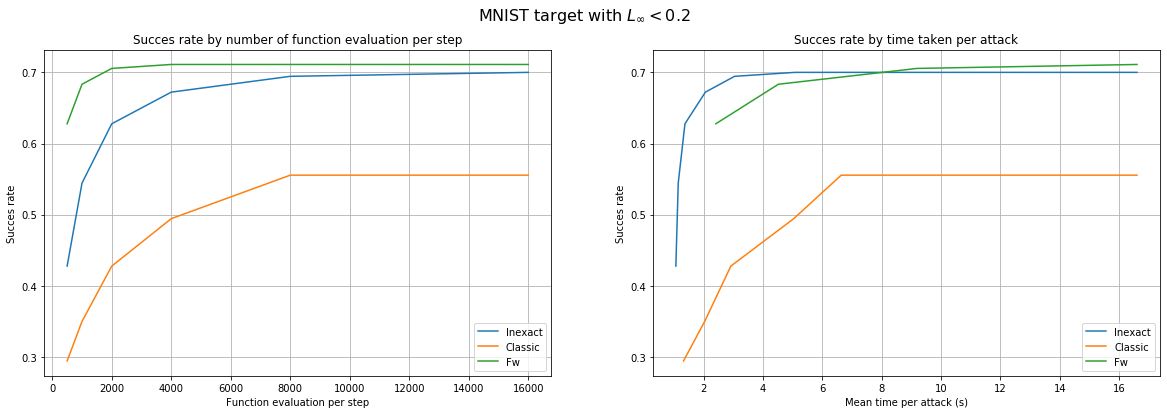

In [71]:
fig = plt.figure(figsize = (20, 6))
fig.suptitle('MNIST target with $L_{\infty} < 0.2$', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
plot_by_gradient(df, ax, title='Succes rate by number of function evaluation per step')
ax = fig.add_subplot(1, 2, 2)
plot_by_time(df, ax, title='Succes rate by time taken per attack')
plt.show()

**1.b L2 norm**

In [64]:
### UNTARGET
### TARGET
target = 'MU2.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG', 'FrankWolfe']
features = ['Optim', 'Target', 'Data', 'SuccesRate', 'NGradient', 'MeanTime', 'MeanEpsilon']
epsilon = 2

df = get_dataframe(target, target_folder, features, epsilon)
df = df.sort_values(by='NGradient').sort_values(by='Optim')

zoo = pd.read_csv('.//ZOO//ZOO_Results.csv')
zoo = zoo.loc[(zoo.Data == 'mnist') & (zoo.Target == 1)]
zoo.Optim = zoo.Optim + '.' + zoo.Solver
zoo.columns = zoo.columns[:-3].tolist() + ['NGradient'] + zoo.columns[-2:].tolist()

latex_table = create_table(df)
latex_table = pd.concat([latex_table, zoo]).iloc[:, :7]
latex_table

,Optim,Target,Data,SuccesRate,NGradient,MeanTime,MeanEpsilon
10,classic,0,mnist,0.750000,8000,2.343280,1.299971
9,fw,0,mnist,0.790000,2000,8.306141,1.355726
5,inexact,0,mnist,0.830000,16000,2.765763,1.762076
3,zoo.adam,1,mnist,0.980000,128,6.200449,2.421824
7,zoo.newton,1,mnist,0.977778,128,21.061184,2.137386


In [62]:
### TARGET
target = 'MT2.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG', 'FrankWolfe']
features = ['Optim', 'Target', 'Data', 'SuccesRate', 'NGradient', 'MeanTime', 'MeanEpsilon']
epsilon = 4

df = get_dataframe(target, target_folder, features, epsilon)
df = df.sort_values(by='NGradient').sort_values(by='Optim')

zoo = pd.read_csv('.//ZOO//ZOO_Results.csv')
zoo = zoo.loc[(zoo.Data == 'mnist') & (zoo.Target == 1)]
zoo.Optim = zoo.Optim + '.' + zoo.Solver
zoo.columns = zoo.columns[:-3].tolist() + ['NGradient'] + zoo.columns[-2:].tolist()

latex_table = create_table(df)
latex_table = pd.concat([latex_table, zoo]).iloc[:, :7]
latex_table

,Optim,Target,Data,SuccesRate,NGradient,MeanTime,MeanEpsilon
7,classic,1,mnist,0.894444,32000,4.979423,2.319200
14,fw,1,mnist,0.961111,4000,5.510558,2.587410
3,inexact,1,mnist,0.966667,4000,0.357018,3.522644
3,zoo.adam,1,mnist,0.980000,128,6.200449,2.421824
7,zoo.newton,1,mnist,0.977778,128,21.061184,2.137386


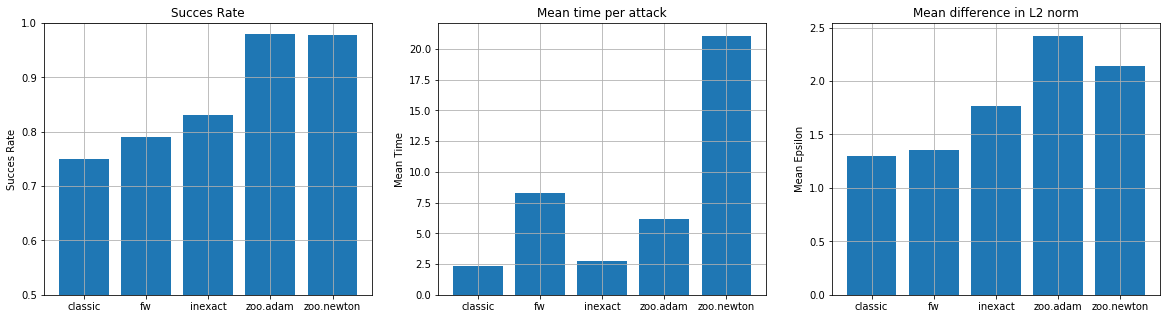

In [65]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 3, 1)
ax.bar(latex_table.Optim, latex_table.SuccesRate)
ax.set_ylim([0.5, 1])
ax.grid()
ax.set_title('Succes Rate')
ax.set_ylabel('Succes Rate')

ax = fig.add_subplot(1, 3, 2)
ax.bar(latex_table.Optim, latex_table.MeanTime)
#ax.set_ylim([0.5, 1])
ax.grid()
ax.set_title('Mean time per attack')
ax.set_ylabel('Mean Time')

ax = fig.add_subplot(1, 3, 3)
ax.bar(latex_table.Optim, latex_table.MeanEpsilon)
#ax.set_ylim([0.5, 1])
ax.grid()
ax.set_title('Mean difference in L2 norm')
ax.set_ylabel('Mean Epsilon')

plt.show()

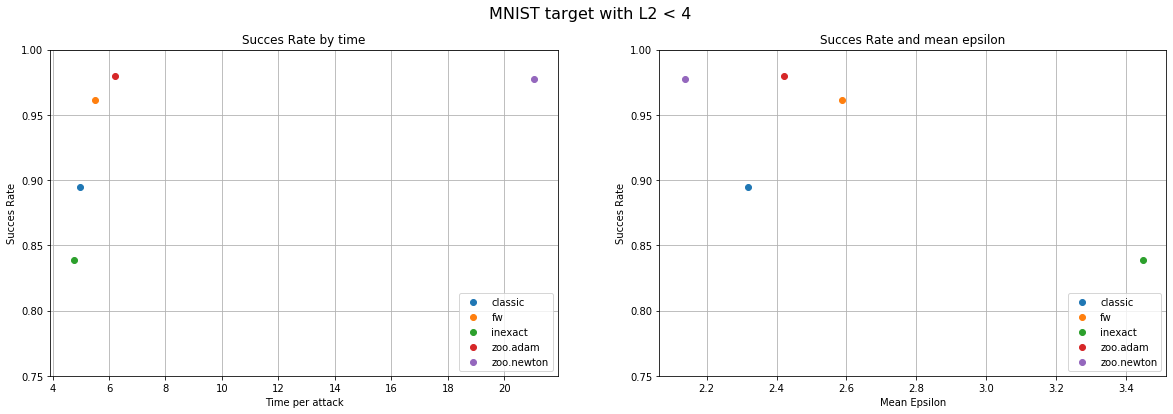

In [9]:
fig = plt.figure(figsize = (20, 6))
fig.suptitle('MNIST target with L2 < 4', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
scatter_by_time(latex_table, ax)
ax = fig.add_subplot(1, 2, 2)
scatter_by_epsilon(latex_table, ax)

### 2. CIFAR10

**2.a Infinity norm**

In [80]:
### UNTARGET
target = 'CUI.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG', 'FrankWolfe']
features = ['Optim', 'Target', 'Data', 'Epsilon', 'SuccesRate', 'NGradient', 'MeanTime']
epsilon = 0.01

df = get_dataframe(target, target_folder, features, epsilon)
latex_table = create_table(df)
latex_table

,Optim,Target,Data,Epsilon,SuccesRate,NGradient,MeanTime
2,inexact,0,cifar10,0.01,0.90,2000,5.263743
12,classic,0,cifar10,0.01,0.96,16000,43.213152
17,fw,0,cifar10,0.01,1.00,2000,9.302093


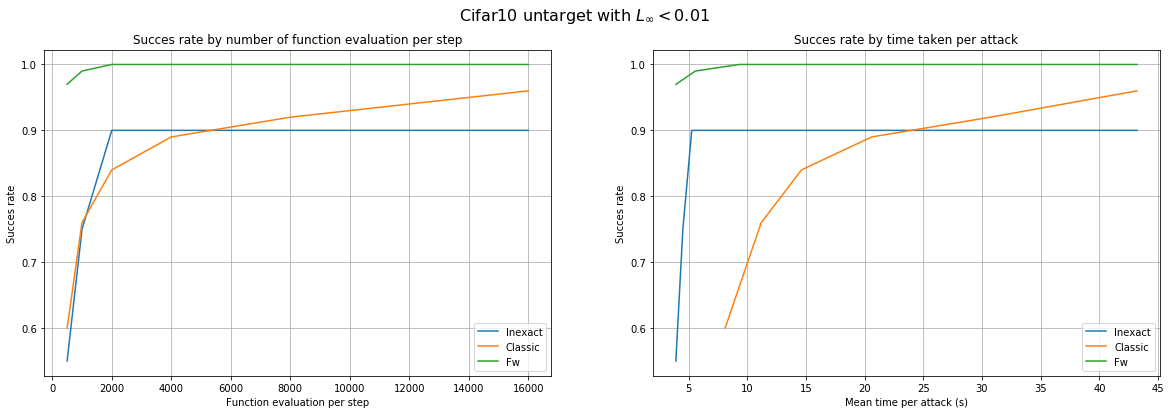

In [81]:
fig = plt.figure(figsize = (20, 6))
fig.suptitle('Cifar10 untarget with $L_{\infty} < 0.01$', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
plot_by_gradient(df, ax, title='Succes rate by number of function evaluation per step')
ax = fig.add_subplot(1, 2, 2)
plot_by_time(df, ax, title='Succes rate by time taken per attack')
plt.show()

**2.b L2 norm**

In [86]:
### UNTARGET
target = 'CU2.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG', 'FrankWolfe']
features = ['Optim', 'Target', 'Data', 'SuccesRate', 'NGradient', 'MeanTime', 'MeanEpsilon']
epsilon = 0.5

df = get_dataframe(target, target_folder, features, epsilon)
df = df.sort_values(by='NGradient').sort_values(by='Optim')

zoo = pd.read_csv('.//ZOO//ZOO_Results.csv')
zoo = zoo.loc[(zoo.Data == 'cifar10') & (zoo.Target == 0)]
zoo.Optim = zoo.Optim + '.' + zoo.Solver
zoo.columns = zoo.columns[:-3].tolist() + ['NGradient'] + zoo.columns[-2:].tolist()

latex_table = create_table(df)
latex_table = pd.concat([latex_table, zoo]).iloc[:, :7]
latex_table

,Optim,Target,Data,SuccesRate,NGradient,MeanTime,MeanEpsilon
11,classic,0,cifar10,1.0,16000,4.141897,0.188103
23,fw,0,cifar10,1.0,500,0.727500,0.277207
9,inexact,0,cifar10,1.0,8000,3.075989,0.497408
0,zoo.adam,0,cifar10,1.0,128,5.016601,0.364428
4,zoo.newton,0,cifar10,1.0,128,39.924799,0.388859


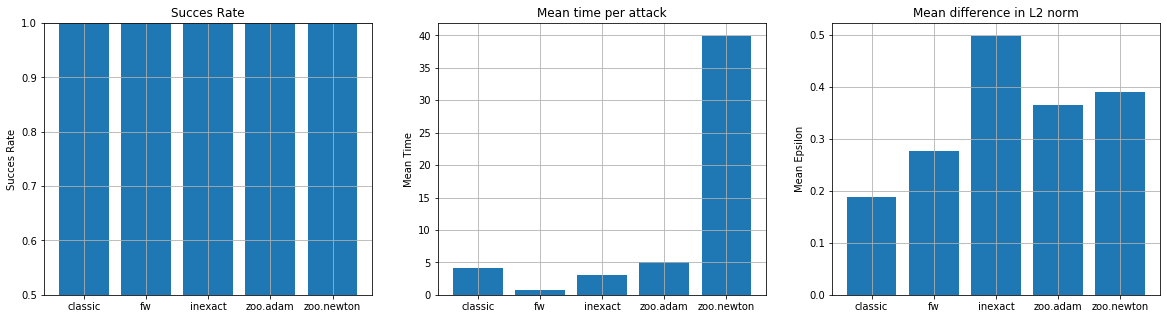

In [87]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 3, 1)
ax.bar(latex_table.Optim, latex_table.SuccesRate)
ax.set_ylim([0.5, 1])
ax.grid()
ax.set_title('Succes Rate')
ax.set_ylabel('Succes Rate')

ax = fig.add_subplot(1, 3, 2)
ax.bar(latex_table.Optim, latex_table.MeanTime)
#ax.set_ylim([0.5, 1])
ax.grid()
ax.set_title('Mean time per attack')
ax.set_ylabel('Mean Time')

ax = fig.add_subplot(1, 3, 3)
ax.bar(latex_table.Optim, latex_table.MeanEpsilon)
#ax.set_ylim([0.5, 1])
ax.grid()
ax.set_title('Mean difference in L2 norm')
ax.set_ylabel('Mean Epsilon')

plt.show()